<a href="https://www.kaggle.com/code/aleksandrmorozov123/transformers?scriptVersionId=233212239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-object-detection/data/sample_submission.csv
/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv
/kaggle/input/car-object-detection/data/testing_images/vid_5_26420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31520.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31720.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_26560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_27840.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28360.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_25240.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29020.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_30720.jpg
/kaggle/

**Self-attention mechanizm is a foundational block of all transformer architectures**

In [2]:
import torch
from torch.nn.functional import softmax

In [3]:
# we start with 3 inputs, each with dimension 4
x = [
    [1, 0, 2, 0],
    [0, 3, 0, 3],
    [2, 2, 2, 2]
]

x = torch.tensor (x, dtype = torch.float32)
x

tensor([[1., 0., 2., 0.],
        [0., 3., 0., 3.],
        [2., 2., 2., 2.]])

In [4]:
# initialise weights
w_key = [
    [0, 1, 1],
    [2, 1, 0],
    [1, 0, 1],
    [3, 3, 1]
]
w_query = [
    [1, 0, 1],
    [2, 0, 3],
    [0, 2, 3],
    [0, 2, 2]
]
w_value = [
    [0, 2, 1],
    [0, 2, 0],
    [1, 3, 0],
    [2, 2, 0]
]

w_key = torch.tensor (w_key, dtype = torch.float32)
w_query = torch.tensor (w_query, dtype = torch.float32)
w_value = torch.tensor (w_value, dtype = torch.float32)

print ("Weights for key: \n", w_key)
print ("Weights for query: \n", w_query)
print ("Weights for value: \n", w_value)

Weights for key: 
 tensor([[0., 1., 1.],
        [2., 1., 0.],
        [1., 0., 1.],
        [3., 3., 1.]])
Weights for query: 
 tensor([[1., 0., 1.],
        [2., 0., 3.],
        [0., 2., 3.],
        [0., 2., 2.]])
Weights for value: 
 tensor([[0., 2., 1.],
        [0., 2., 0.],
        [1., 3., 0.],
        [2., 2., 0.]])


In [5]:
# adding the bias vector to the product of matrix multiplication
keys = x @ w_key
querys = x @ w_query
values = x @ w_value

print ("Keys: \n", keys)
print ("Querys: \n", querys)
print ("Values: \n", values)

Keys: 
 tensor([[ 2.,  1.,  3.],
        [15., 12.,  3.],
        [12., 10.,  6.]])
Querys: 
 tensor([[ 1.,  4.,  7.],
        [ 6.,  6., 15.],
        [ 6.,  8., 18.]])
Values: 
 tensor([[ 2.,  8.,  1.],
        [ 6., 12.,  0.],
        [ 6., 18.,  2.]])


In [6]:
# calculating attention scores
attn_scores = querys @ keys.T
print (attn_scores)

tensor([[ 27.,  84.,  94.],
        [ 63., 207., 222.],
        [ 74., 240., 260.]])


In [7]:
# calculate softmax
attn_scores_softmax = softmax (attn_scores, dim = -1)

print (attn_scores_softmax)

tensor([[7.9845e-30, 4.5398e-05, 9.9995e-01],
        [0.0000e+00, 3.0590e-07, 1.0000e+00],
        [0.0000e+00, 2.0612e-09, 1.0000e+00]])


In [8]:
attn_scores_softmax = [
    [0.0, 0.5, 0.5],
    [0.0, 1.0, 0.0],
    [0.0, 0.9, 0.1]
]
attn_scores_softmax = torch.tensor (attn_scores_softmax)

print (attn_scores_softmax)

tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])


In [9]:
# multiply scores with values
weighted_values = values[:, None] * attn_scores_softmax.T[:,:, None]
print (weighted_values)

tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 3.0000,  6.0000,  0.0000],
         [ 6.0000, 12.0000,  0.0000],
         [ 5.4000, 10.8000,  0.0000]],

        [[ 3.0000,  9.0000,  1.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.6000,  1.8000,  0.2000]]])


In [10]:
# multiply scores with values of input 2 and input 3
outputs = weighted_values.sum (dim = 0)
print (outputs)

tensor([[ 6.0000, 15.0000,  1.0000],
        [ 6.0000, 12.0000,  0.0000],
        [ 6.0000, 12.6000,  0.2000]])


**Inference with DPT transformer**

In [11]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481.4 kB 7.7 MB/s eta 0:00:00


In [12]:
from transformers import DPTFeatureExtractor, DPTForDepthEstimation

feature_extractor = DPTFeatureExtractor.from_pretrained ("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained ("Intel/dpt-large")

preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/dpt/feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


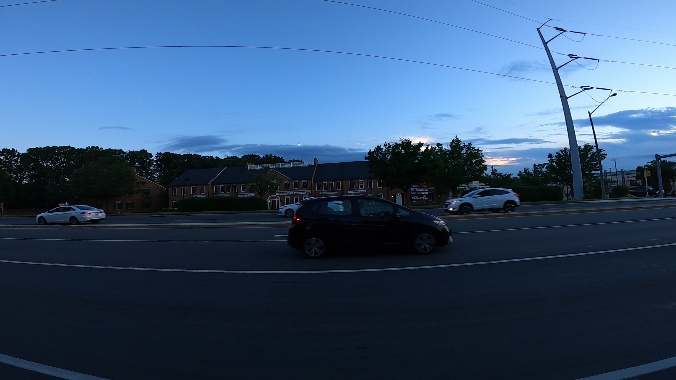

In [13]:
from PIL import Image
import requests

image = Image.open ('/kaggle/input/car-object-detection/data/training_images/vid_4_29900.jpg')
image

**Forward pass**

In [14]:
import torch

pixel_values = feature_extractor (image, return_tensors="pt").pixel_values

with torch.no_grad ():
    outputs = model (pixel_values)
    predicted_depth = outputs.predicted_depth

**Visualization**

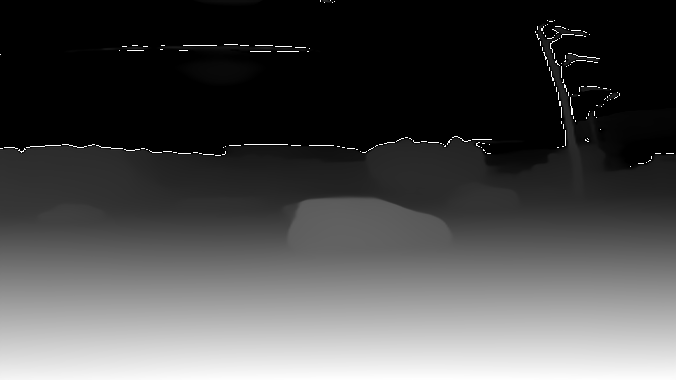

In [15]:
import numpy as np

# interpolate to the original size
prediction = torch.nn.functional.interpolate (
    predicted_depth.unsqueeze (1),
    size = image.size[::-1],
    mode = "bicubic",
    align_corners = False,
).squeeze()
output = prediction.cpu().numpy()
formatted = (output * 255 / np.max(output)).astype ('uint8')
depth = Image.fromarray (formatted)
depth